In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import  StandardScaler,MinMaxScaler
import joblib
from sklearn.metrics import confusion_matrix,classification_report

import warnings
warnings.filterwarnings("ignore")

### Phân công công việc
1. 1712489 Đỗ Bĩnh Huy : 40% (Đồ án 2)
1. 1712609 Đỗ Thị Kim Ngân : 30% (Đồ án 2)
1. 1712756 Nguyễn Hữu Thắng : 30% (Đồ án 2)

Tải dữ liệu tại link: https://drive.google.com/drive/folders/1nj4R5Vb649oVFda05G4AyoOmIRx6PXAR?usp=sharing

# Đọc dữ liệu và xem thông tin

In [7]:
df_train = pd.read_csv('train.csv')
df_train.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,16,123,124,128,133,137,143,147,151,156,...,16,17,17,17,13,38,212,219,218,219
1,0,141,142,143,145,147,149,150,151,151,...,180,179,180,180,181,181,182,182,182,184
2,8,217,218,218,218,218,218,217,218,217,...,239,241,239,239,237,235,233,232,231,228
3,4,214,215,217,216,217,217,218,218,220,...,74,233,255,255,255,255,255,255,255,255
4,10,134,137,140,142,144,145,145,147,148,...,213,210,211,211,211,209,208,208,208,207
5,20,132,136,139,143,147,148,150,153,155,...,134,139,105,65,127,229,219,221,221,221
6,13,163,169,174,178,181,182,185,189,191,...,54,47,200,219,213,215,212,211,209,209
7,24,170,172,173,175,175,176,176,178,178,...,89,221,214,217,207,163,128,99,91,86
8,14,189,189,189,191,192,192,191,191,191,...,128,132,136,137,140,151,169,184,193,201
9,21,147,149,150,152,155,156,156,157,157,...,90,58,96,178,166,166,164,164,162,159


In [8]:
df_train.info()
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 161.7 MB


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000
mean,12.313111,145.405593,148.488963,151.239444,153.553444,156.212074,158.414444,160.487000,162.348370,163.968852,...,141.132333,147.493667,153.330444,159.113037,161.951370,162.723148,162.884481,161.946407,161.138037,159.838444
std,7.289435,41.365893,39.953754,39.062139,38.585382,37.120041,36.137760,35.001018,33.662693,32.646610,...,63.749579,65.511692,64.424009,63.741503,63.758663,63.475755,63.540967,63.336766,63.625567,64.408869
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,95.000000,103.000000,112.000000,120.000000,125.000000,128.000000,127.000000,128.000000,126.000000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


- Nhóm dùng hàm df_train.info() để xem số dòng và số cột của dữ liệu: có 27000 dòng và 785 cột(1 cột label, 784 cột giá trị pixel), toàn bộ đều có kiểu int 64. 
- Nhóm dùng hàm describe() để khảo sát các thuộc tính dạng số này xem như thế nào. Qua khảo sát ta thấy giá trị label trung bình khoảng 12 và giá nhỏ nhất là 0 và cao nhất là 24 và  giá trị các pixel trung bình khoảng từ 140  đến 170  và giá nhỏ nhất là 0 và cao nhất là 255.

In [9]:
df_train.isnull().mean().sort_values(ascending=True)

label       0.0
pixel517    0.0
pixel518    0.0
pixel519    0.0
pixel520    0.0
           ... 
pixel264    0.0
pixel265    0.0
pixel266    0.0
pixel268    0.0
pixel784    0.0
Length: 785, dtype: float64

dữ liệu này đầy đủ không có thiếu dữ liệu.

# Hiển thị hình ảnh 1 số mẫu ngẫu nhiên

In [10]:
# chia dữ liệu
label_df = df_train['label']
df_train.drop(['label'], axis = 1, inplace = True)
pixel_df= df_train

Hiển thị ngẫu nhiên 1 số mẫu(nhãn và giá trị index) của chúng

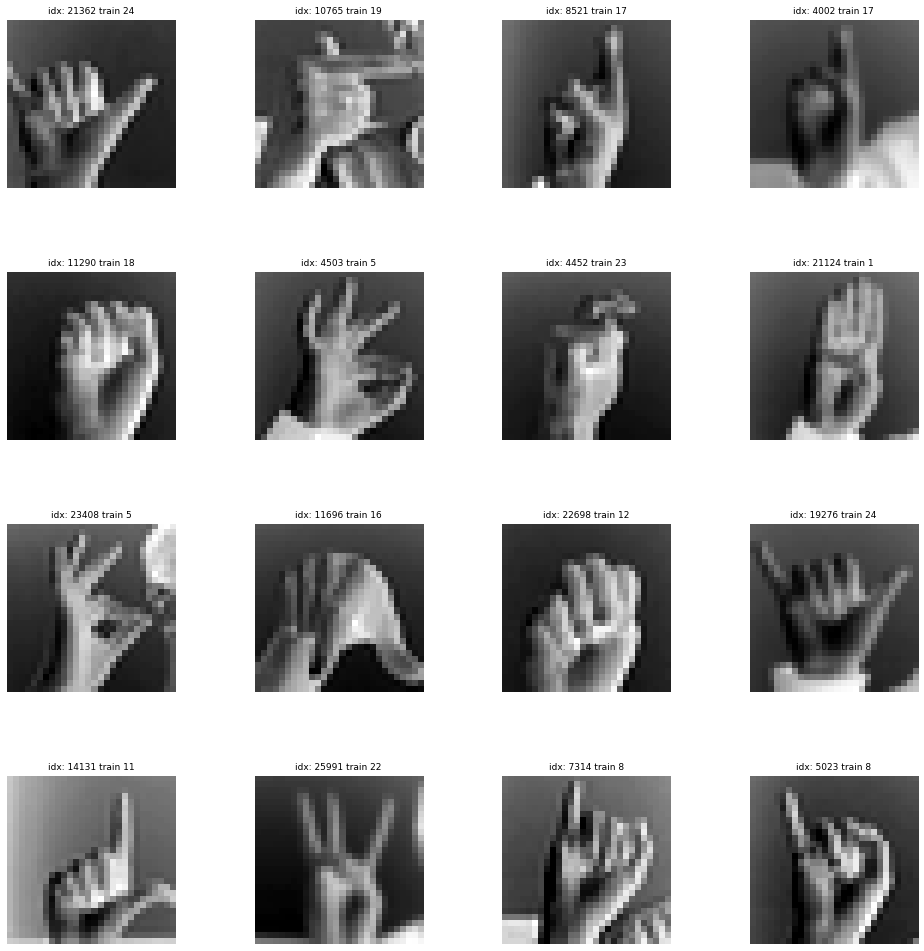

In [11]:
#xác định giá trị grid
W_grid = 4
L_grid = 4
fig, axes = plt.subplots(L_grid, W_grid,figsize = (17,17))
axes = axes.ravel()# chuyển ma trận 15*15 sang mảng 225
n_df_train = len(df_train) 
for i in np.arange(0, W_grid * L_grid): 
   # lụa chọn index ngẫu nhiên để lấy mẫu ngẫu nhiên
    index = np.random.randint(0, n_df_train)    
    axes[i].imshow(pixel_df.iloc[[index]].values.reshape((28,28)),cmap=plt.cm.binary )
    axes[i].set_title("idx: "+str(index)+" train %d" % label_df.iloc[[index]].values , fontsize = 9)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.5)
plt.show()

Qua phần biểu diễn hình ảnh, nhóm thấy đây là bộ dữ liệu về ngôn ngữ kí hiệu của bàn tay với khoảng 25 kí hiệu được biểu diễn. Mỗi kí hiệu sẽ có nhiều hình ảnh và có nhiều tư thế cùng biểu diễn cho 1 kí hiệu.

In [14]:
label_df.value_counts()

17    1263
16    1258
11    1225
22    1206
5     1182
18    1180
14    1180
3     1176
19    1164
8     1147
23    1146
20    1137
13    1131
2     1127
0     1109
24    1100
10    1096
6     1076
15    1067
21    1065
12    1031
7     1001
1      998
4      935
Name: label, dtype: int64

Nhóm thấy giá trị nhãn thường xuất hiện nhất là 17 và ít xuất hiện nhất là 4

# Tiền xử lý dữ liệu (Data preprocessing)

In [15]:
# chia tập dữ liệu thành train và test với tỉ lệ test = 0.25
train_x, test_x, train_y, test_y = train_test_split(pixel_df, label_df, test_size = 0.25, random_state = 42)
#chuẩn hóa
X_train = StandardScaler().fit_transform(train_x)
X_test=StandardScaler().fit_transform(test_x)
train_x.shape, train_y.shape, test_x.shape, test_y.shape


((20250, 784), (20250,), (6750, 784), (6750,))

In [16]:
X_train,X_test

(array([[ 1.41886229,  1.46670769,  1.42971969, ..., -0.49088285,
         -0.59959617, -0.64989633],
        [-0.36816298, -0.43371338, -0.43789562, ...,  0.11058199,
          0.10853321,  0.12648177],
        [ 0.09066783,  0.16641959,  0.25286621, ..., -2.01037295,
         -1.74833939, -1.90762886],
        ...,
        [-0.05422611, -0.05863027, -0.02855528, ...,  0.58542264,
          0.58061947,  0.56125351],
        [ 0.38045571,  0.34145837,  0.30403375, ..., -2.56435372,
         -2.53514982, -2.48214866],
        [ 0.38045571,  0.36646391,  0.35520129, ...,  0.4113144 ,
          0.40752117,  0.40597789]]),
 array([[ 0.43936666,  0.4287209 ,  0.42047421, ..., -0.09004425,
         -1.20969008, -1.95248754],
        [ 0.12404463,  0.15258385,  0.13828823, ...,  0.80333938,
          0.82621197,  0.84142211],
        [-1.11298795, -0.80134414, -0.73392298, ...,  0.45852465,
          0.4816747 ,  0.49994426],
        ...,
        [-0.99171025, -2.28244287, -1.17002859, ..., -

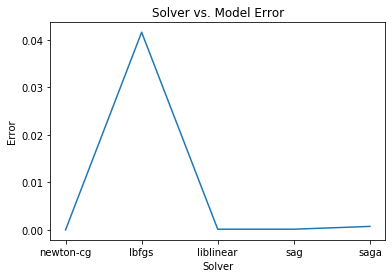

Optimal Solver: newton-cg


In [17]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
solver_error = []
for solverInstance in solvers:
    lg = LogisticRegression(solver=solverInstance, multi_class='auto')
    lg.fit(train_x, train_y)
    pred=lg.predict(test_x)
    error = 1 - lg.score(test_x, test_y)
    solver_error.append(error)
plt.plot(solvers, solver_error)
plt.title('Solver vs. Model Error')
plt.xlabel('Solver')
plt.ylabel('Error')
plt.show()

minError = solver_error.index(min(solver_error))
bestSolver = solvers[minError]

print("Optimal Solver: " + str(bestSolver))

Nhóm thấy chọn lựa lg = LogisticRegression(solver = 'newton-cg') là tốt nhất

In [18]:
def train (train_x,train_y):
    #best model
    lg = LogisticRegression(solver = 'newton-cg')
    lg.fit(train_x, train_y)
    joblib.dump(lg, 'best_saved_logistic')
def test (test_x, test_y):
    lg = joblib.load('best_saved_logistic')
    pred = lg.predict(test_x)
    score = lg.score(test_x, test_y)
    print("Accuracy: " + str(score*100))
    return lg,pred

In [21]:
cm=confusion_matrix(test_y, pred)
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       288
           1       1.00      1.00      1.00       253
           2       1.00      1.00      1.00       308
           3       1.00      1.00      1.00       300
           4       1.00      1.00      1.00       212
           5       1.00      1.00      1.00       293
           6       1.00      1.00      1.00       264
           7       1.00      1.00      1.00       246
           8       1.00      1.00      1.00       270
          10       1.00      1.00      1.00       270
          11       1.00      1.00      1.00       319
          12       1.00      1.00      1.00       238
          13       1.00      1.00      1.00       299
          14       1.00      1.00      1.00       283
          15       1.00      1.00      1.00       257
          16       1.00      1.00      1.00       326
          17       0.99      1.00      1.00       309
          18       1.00    

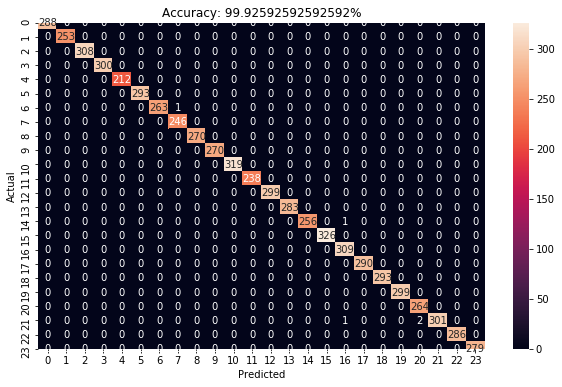

In [22]:
# X-axis Predicted vs Y-axis Actual Values
score = lg.score(test_x, test_y)
plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Accuracy: " + str(score * 100) + "%")
plt.show()

In [23]:
def error_rate(confusion_matrix):
    a = confusion_matrix
    b = a.sum(axis=1)
    df = []
    for i in range(0,24):
        temp = 1-a[i][i]/b[i]
        df.append(temp)
    
    df = pd.DataFrame(df)
    df.columns = ['% Error rate']
    return df*100

error_rate(cm)

,% Error rate
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
5,0.000000
6,0.378788
7,0.000000
8,0.000000
9,0.000000


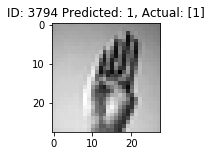

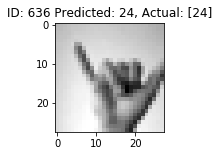

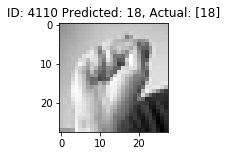

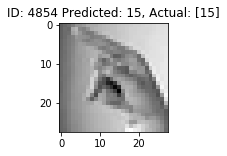

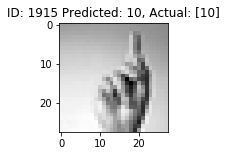

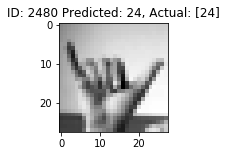

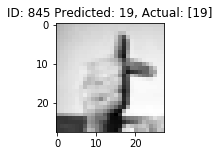

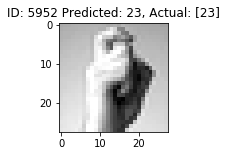

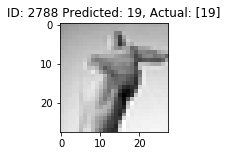

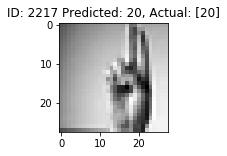

In [26]:
index_OK=0
m_OK=[]
for label, predict in zip(test_y, pred):
    if label == predict:
        m_OK.append(index_OK)
    index_OK+=1

#OK predictions
import random
random.shuffle(m_OK)
for plotIndex, badIndex in enumerate(m_OK[0:10]):
    plt.figure(figsize=(2,2))
    image = test_x.iloc[[badIndex]].values.reshape((28,28))
    imgplot = plt.imshow(image,cmap=plt.cm.gray)
    plt.title("ID: "+ 
              str(m_OK[badIndex]) +" Predicted: " + 
              str(pred[badIndex]) + ", Actual: " + 
              str(test_y.iloc[[badIndex]].values))
    plt.plot()